# Import Library

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import datetime
import random
import operator
import math
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# Loading Dataset

In [99]:
age_data=pd.read_csv("AgeGroupDetails.csv")
covid_india=pd.read_csv("covid_19_india.csv")
hospital_data=pd.read_csv("HospitalBedsIndia.csv")
testlab_data=pd.read_csv("ICMRTestingLabs.csv")
confirmed_cases=pd.read_csv("time_series_covid_19_confirmed.csv")
recovered_cases=pd.read_csv("time_series_covid_19_recovered.csv")
death_cases=pd.read_csv("time_series_covid_19_deaths.csv")

# Coronavirus Symptoms 

In [67]:
symptoms={'symptoms':['Fever','Tiredness','Dry-cough','Shortness of breath','aches and pains','Sore throat','Diarrhoea',
                      'Nausea','vomiting','abdominal pain'],'percentage':[98.6,69.9,82,16.6,14.8,13.9,10.1,10.1,3.6,2.2]}
symptoms=pd.DataFrame(data=symptoms,index=range(10))
symptoms

,symptoms,percentage
0,Fever,98.6
1,Tiredness,69.9
2,Dry-cough,82.0
3,Shortness of breath,16.6
4,aches and pains,14.8
5,Sore throat,13.9
6,Diarrhoea,10.1
7,Nausea,10.1
8,vomiting,3.6
9,abdominal pain,2.2


# Data Visualization

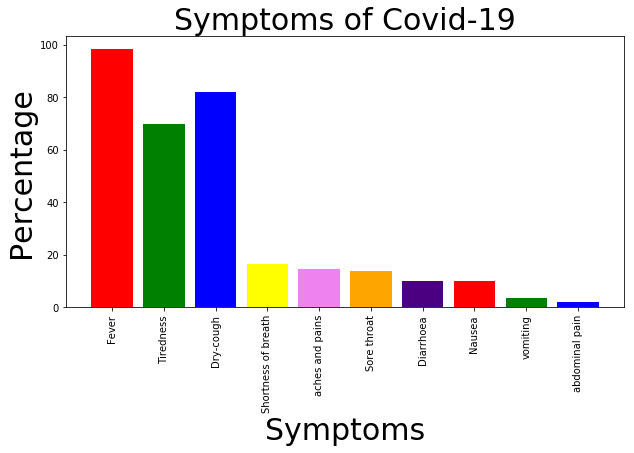

In [68]:
plt.figure(figsize=(10,5))
height=symptoms.percentage
bars=symptoms.symptoms
y_pos=np.arange(len(bars))
my_colors=['red','green','blue','yellow','violet','orange','indigo']
plt.bar(y_pos, height,color=my_colors)
plt.xticks(y_pos,bars)
plt.xticks(rotation=90)
plt.xlabel("Symptoms",size=30)
plt.ylabel("Percentage",size=30)
plt.title("Symptoms of Covid-19",size=30)
plt.show()

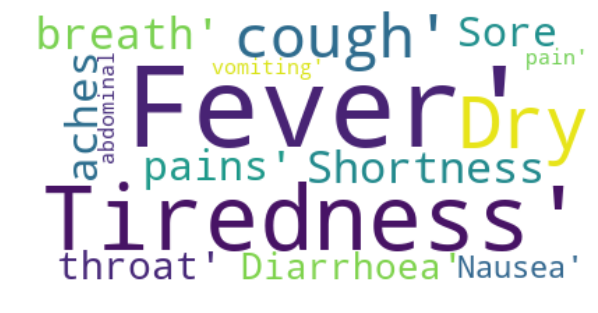

In [69]:
from wordcloud import WordCloud,STOPWORDS
text=symptoms['symptoms'].to_list()
plt.figure(figsize=(10,6))
wordcloud=WordCloud(max_words=200,background_color='White',).generate(str(text))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

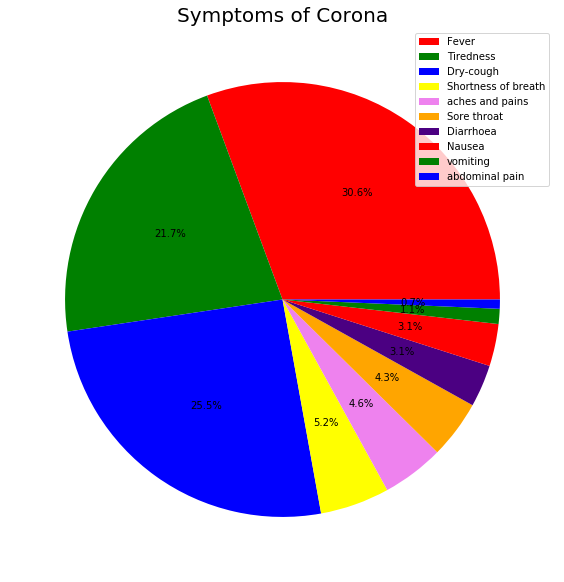

In [93]:
plt.figure(figsize=(20,10))
plt.title("Symptoms of Corona",fontsize=20)
plt.pie(symptoms["percentage"],colors = ['red','green','blue','yellow','violet','orange','indigo'],autopct="%1.1f%%")
plt.legend(symptoms['symptoms'],loc='best')
plt.show() 

# Age Data

In [70]:
#Read Data
age_data

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [71]:
#2.Understanding data
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 400.0+ bytes


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'AgeGroup')]

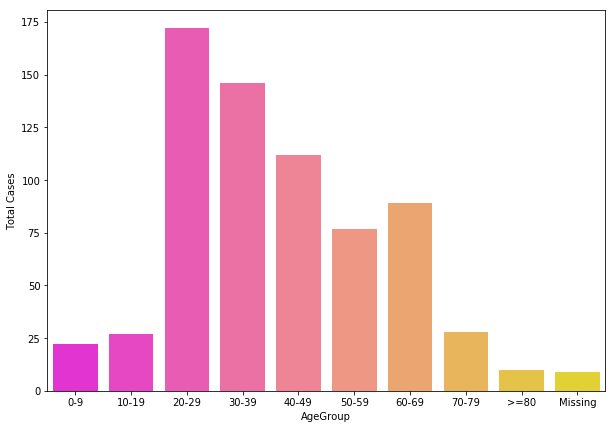

In [72]:
#3.Visualize dataset:
plt.subplots(figsize=(10, 7))
ax = sns.barplot(age_data['AgeGroup'], age_data['TotalCases'], palette='spring')
ax.set(xlabel='AgeGroup', ylabel='Total Cases')

# Details of Hospitals and healthcare facilities in India

In [73]:
#Read Dataset
hospital_data.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


# Understanding  data

In [74]:
hospital_data.info()
hospital_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
Sno                                 37 non-null int64
State/UT                            37 non-null object
NumPrimaryHealthCenters_HMIS        37 non-null object
NumCommunityHealthCenters_HMIS      37 non-null int64
NumSubDistrictHospitals_HMIS        30 non-null float64
NumDistrictHospitals_HMIS           37 non-null int64
TotalPublicHealthFacilities_HMIS    37 non-null int64
NumPublicBeds_HMIS                  37 non-null int64
NumRuralHospitals_NHP18             37 non-null int64
NumRuralBeds_NHP18                  37 non-null int64
NumUrbanHospitals_NHP18             37 non-null int64
NumUrbanBeds_NHP18                  37 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 3.5+ KB


,Sno,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
count,37.000000,37.000000,30.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.000000,300.972973,83.666667,54.216216,2039.189189,39947.243243,1070.810811,15112.864865,203.891892,23306.648649
std,10.824355,907.160512,229.572817,163.173584,6130.345694,120196.898697,3278.430865,45752.664986,616.352568,70502.578529
min,1.000000,2.000000,1.000000,1.000000,8.000000,250.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,17.000000,6.000000,9.000000,114.000000,2666.000000,24.000000,630.000000,14.000000,1393.000000
50%,19.000000,82.000000,25.500000,23.000000,683.000000,13527.000000,273.000000,5805.000000,59.000000,5228.000000
75%,28.000000,229.000000,63.250000,37.000000,1867.000000,39511.000000,705.000000,10944.000000,149.000000,18819.000000
max,37.000000,5568.000000,1255.000000,1003.000000,37725.000000,739024.000000,19810.000000,279588.000000,3772.000000,431173.000000


# Number of Public Beds in Each State

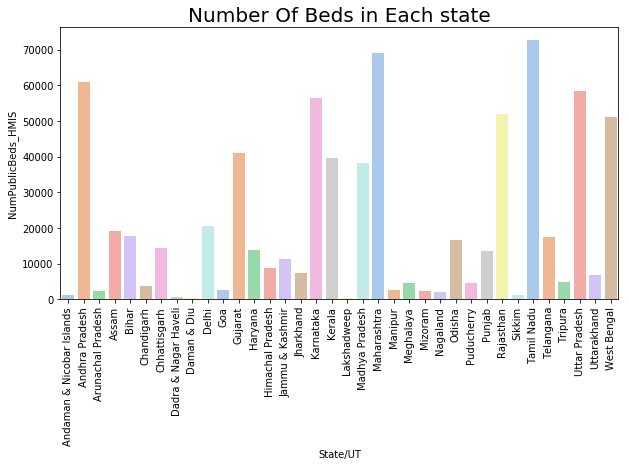

In [75]:
plt.subplots(figsize=(10,5))
Beds= sns.barplot(x=hospital_data['State/UT'].iloc[:36],                      
                  y=hospital_data['NumPublicBeds_HMIS'].iloc[:36], 
                      palette='pastel')
plt.xticks(rotation=90)
plt.title("Number Of Beds in Each state",fontsize=20)
Beds

# Total Public Health Facilities in Each State

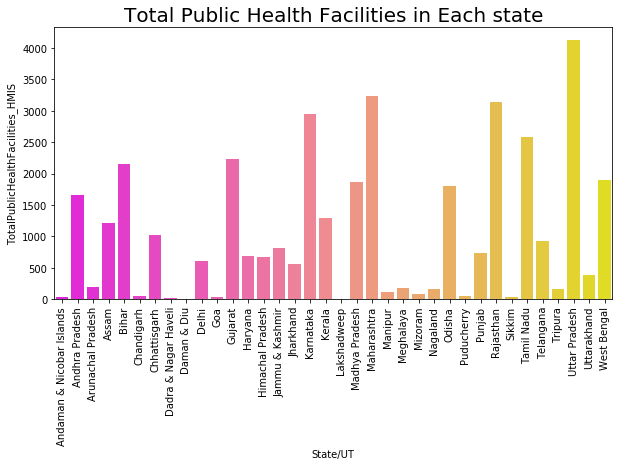

In [76]:
plt.subplots(figsize=(10,5))
Health=sns.barplot(x=hospital_data['State/UT'].iloc[:36],                      
                  y=hospital_data['TotalPublicHealthFacilities_HMIS'].iloc[:36], 
                      palette='spring')
plt.xticks(rotation=90)
plt.title("Total Public Health Facilities in Each state",fontsize=20)
Health

# Details of Testing Labs in India

In [77]:
#Read Dataset
testlab_data.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


# Understanding and cleaning data

In [78]:
print("Check Total information  of testlab data:",testlab_data.info())
print("Check number of labs in each state:",testlab_data['state'].value_counts())
print("Check how many types of labs are present in each state:",testlab_data['type'].unique())
print("Describe all data:",testlab_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
lab        267 non-null object
address    267 non-null object
pincode    267 non-null int64
city       267 non-null object
state      267 non-null object
type       267 non-null object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB
Check Total information  of testlab data: None
Check number of labs in each state: Maharashtra                                 39
Tamil Nadu                                  26
Telangana                                   19
Delhi                                       18
Karnataka                                   17
Uttar Pradesh                               17
Gujarat                                     14
West Bengal                                 13
Kerala                                      12
Haryana                                     11
Madhya Pradesh                              10
Rajasthan                                    9
Andhra Prades

# Visualize Data

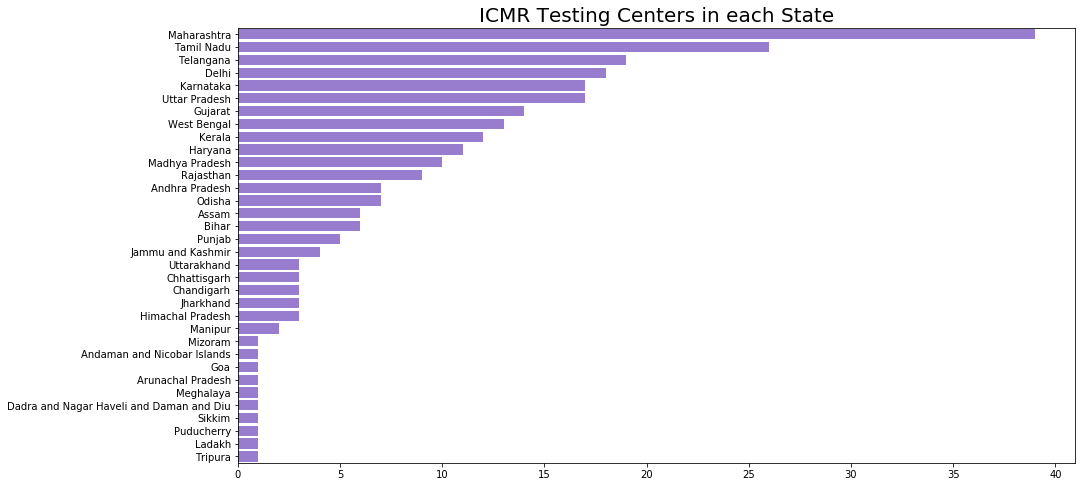

In [79]:
values=list(testlab_data['state'].value_counts())
name=list(testlab_data['state'].value_counts().index)

plt.figure(figsize=(15,8))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State',fontsize = 20)
sns.barplot(x=values y=names,color='#9370db');

# Read covid data

In [80]:
covid_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


# Understanding data and Cleaning data

In [81]:
#drop the Sno column
covid_data=covid_india.drop(['Sno'],axis=1)
covid_data.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [82]:
print("shape/size of the dataset:",covid_data.shape)
print("check for null values in dataset:",covid_data.isnull().sum())
print("check for mean value in cured coluumn:",covid_data['Cured'].agg(np.mean))
print("check for mean value in death coluumn:",covid_data['Deaths'].agg(np.mean))
print("check for mean value in confirmed coluumn:",covid_data['Confirmed'].agg(np.mean))
print("checking for value count for cured column:",covid_data['Cured'].value_counts(dropna=False).head())
print("checking for value count for deaths column:",covid_data['Deaths'].value_counts(dropna=False).head())
print("checking for value count for confirmed column:",covid_data['Confirmed'].value_counts(dropna=False).head())

shape/size of the dataset: (3279, 8)
check for null values in dataset: Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64
check for mean value in cured coluumn: 1315.948154925282
check for mean value in death coluumn: 87.05916437938396
check for mean value in confirmed coluumn: 2894.379078987496
checking for value count for cured column: 0     650
1     209
2      94
3      76
33     51
Name: Cured, dtype: int64
checking for value count for deaths column: 0    1314
1     351
3     144
4     104
2      99
Name: Deaths, dtype: int64
checking for value count for confirmed column: 1     263
2     117
7      92
3      88
33     63
Name: Confirmed, dtype: int64


# Data Exploration

In [83]:
covid_data['ConfirmedForeignNational'].replace('-',0,inplace=True)
covid_data['ConfirmedIndianNational'].replace('-',0,inplace=True)
covid_data['ConfirmedIndianNational']=covid_data['ConfirmedIndianNational'].astype('int64')
covid_data['ConfirmedForeignNational']=covid_data['ConfirmedForeignNational'].astype('int64')


In [84]:
df=covid_data.groupby('State/UnionTerritory')[['ConfirmedIndianNational','ConfirmedForeignNational']].sum()
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational
State/UnionTerritory,,
Andaman and Nicobar Islands,8,0
Andhra Pradesh,81,0
Arunachal Pradesh,0,0
Assam,0,0
Bihar,32,0


In [85]:
df1=df.nlargest(20,'ConfirmedIndianNational')
df2=df.nlargest(20,'ConfirmedForeignNational')

<BarContainer object of 20 artists>

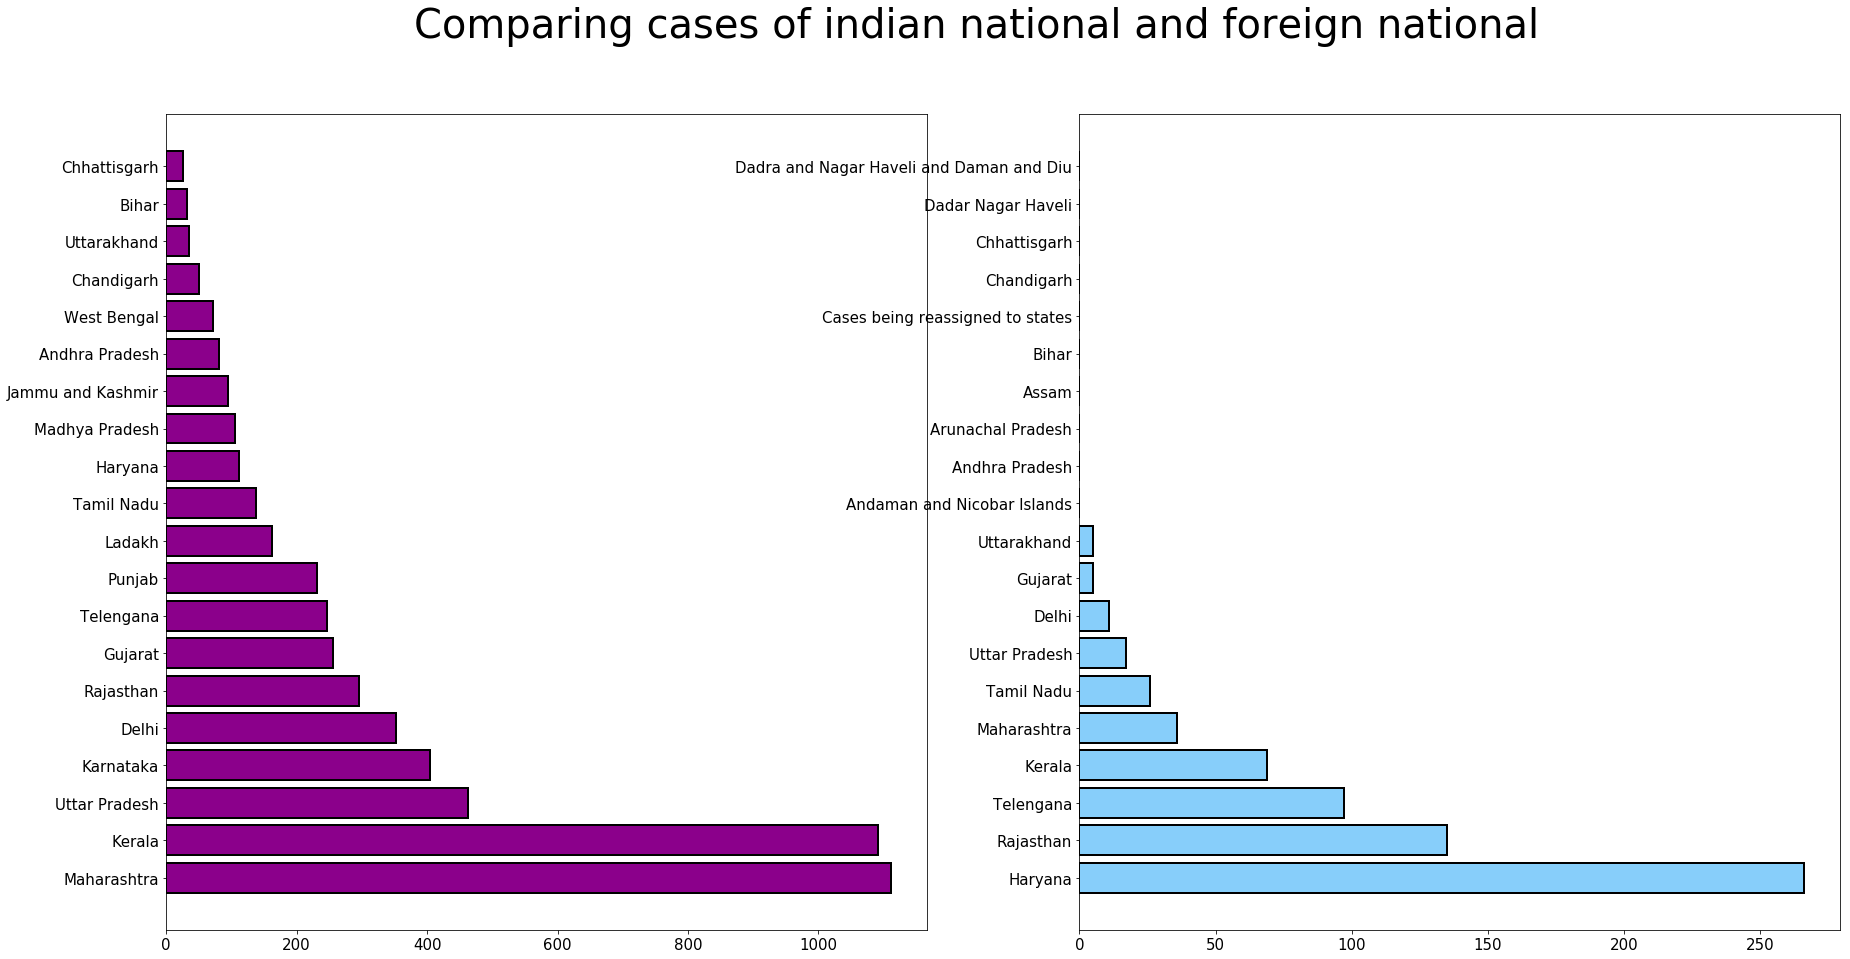

In [86]:
plt.figure(figsize=(30,15))
plt.suptitle('Comparing cases of indian national and foreign national',fontsize=40)
plt.subplot(121)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.barh(df1.index,df1.ConfirmedIndianNational,color='darkmagenta',edgecolor='black',linewidth=2)
plt.subplot(122)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.barh(df2.index,df2.ConfirmedForeignNational,color='lightskyblue',edgecolor='black',linewidth=2)

# Datewise Confirmed vs Recovered vs Deaths

In [87]:
df3=covid_data['Date']=pd.to_datetime(covid_data['Date'])
df3=covid_data.groupby('Date').sum()
df3.reset_index(inplace=True)
df3.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-02,2,0,0,0,2
1,2020-01-03,3,0,0,0,3
2,2020-01-04,0,0,144,41,1834
3,2020-01-05,0,0,9065,1152,34972
4,2020-01-06,0,0,91819,5394,190535


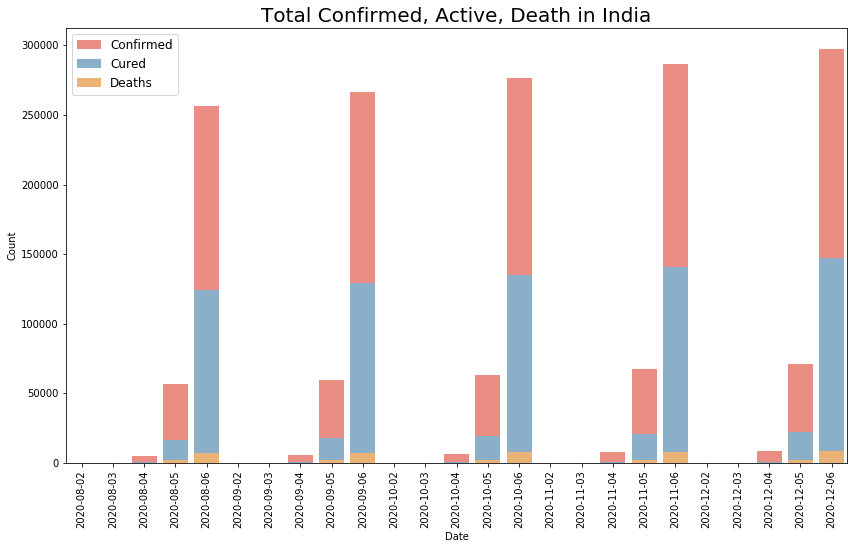

In [88]:
df4=df3.tail(25)
df4['Date']=df4['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df4,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df4,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df4,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India",fontsize = 20)
plt.legend(frameon=True,fontsize=12);

# Covid-19 State wise Analysis

In [89]:
state_cases=covid_data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured
0,Andaman and Nicobar Islands,47,0,36
1,Andhra Pradesh,8452,101,4111
2,Arunachal Pradesh,135,0,14
3,Assam,4904,9,3039
4,Bihar,7533,52,5529


In [90]:
# Creating new columns 'Active', 'Death rate per 100' and 'Cure rate per 100'
state_cases['Active']=state_cases['Confirmed']-(state_cases['Cured']+state_cases['Deaths'])
state_cases['Death rate per 100']=np.round((100*state_cases["Deaths"]/state_cases["Confirmed"]),2)
state_cases['Cure rate per 100']=np.round((100*state_cases["Cured"]/state_cases["Confirmed"]),2)
state_cases=state_cases.sort_values(by='Confirmed', ascending=False)
state_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Reds',subset=["Death rate per 100"])\
                        .background_gradient(cmap='Greens',subset=["Cure rate per 100"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death rate per 100,Cure rate per 100
22,Maharashtra,128205,5984,64153,58068,4.67,50.04
32,Tamil Nadu,56845,704,31316,24825,1.24,55.09
11,Delhi,56746,2112,31294,23340,3.72,55.15
13,Gujarat,26680,1638,18694,6348,6.14,70.07
37,Uttar Pradesh,16594,507,9995,6092,3.06,60.23
30,Rajasthan,14536,337,11274,2925,2.32,77.56
39,West Bengal,13531,540,7865,5126,3.99,58.13
21,Madhya Pradesh,11724,501,8880,2343,4.27,75.74
14,Haryana,10223,149,5128,4946,1.46,50.16
5,Cases being reassigned to states,9265,0,0,9265,0,0


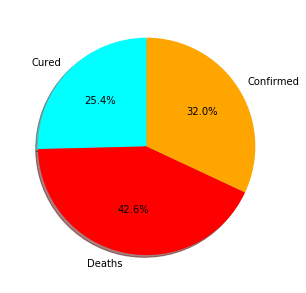

In [91]:
#Using pie chart showing confirmed,deaths and cured cases.
plt.figure(figsize=(5,5))
cured=covid_data[covid_data['Cured']==True]
deaths=covid_data[covid_data['Deaths']==True]
confirmed=covid_data[covid_data['Confirmed']==True]
slices_hours=[cured['Time'].count(),deaths['Time'].count(),confirmed['Time'].count()]
activities=['Cured', 'Deaths','Confirmed']
colors=['aqua', 'red','orange']
explode=(0,0,0)
plt.pie(slices_hours, labels=activities,explode=explode, colors=colors, startangle=90, autopct='%1.1f%%',shadow=True)
plt.show()

# Confirmed vs Cured vs Deaths

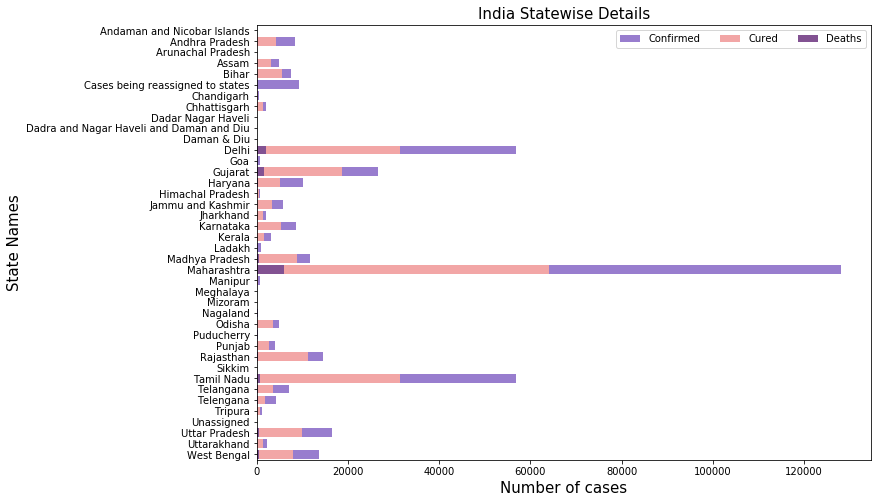

In [92]:
#Defining Statewise Confirmed,deaths abd cured cases.
state_test=pd.pivot_table(covid_data,values=['Confirmed','Cured','Deaths'],index='State/UnionTerritory',aggfunc='max')
state_names=list(state_test.index)
state_test['State/UnionTerritory']=state_names
plt.figure(figsize=(11,8))
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed",y= state_names,data=state_test,label="Confirmed",color = '#9370db')
sns.barplot(x='Cured',y=state_names,data=state_test,label='Cured',color= '#ff9999')
sns.barplot(x='Deaths',y=state_names,data=state_test,label='Deaths',color='#87479d')
plt.xlabel('Number of cases',fontsize=15)
plt.ylabel('State Names',fontsize=15)
plt.title('India Statewise Details',fontsize=15)
plt.legend(ncol=3,loc="upper right",frameon=True);

# Confirmed Cases

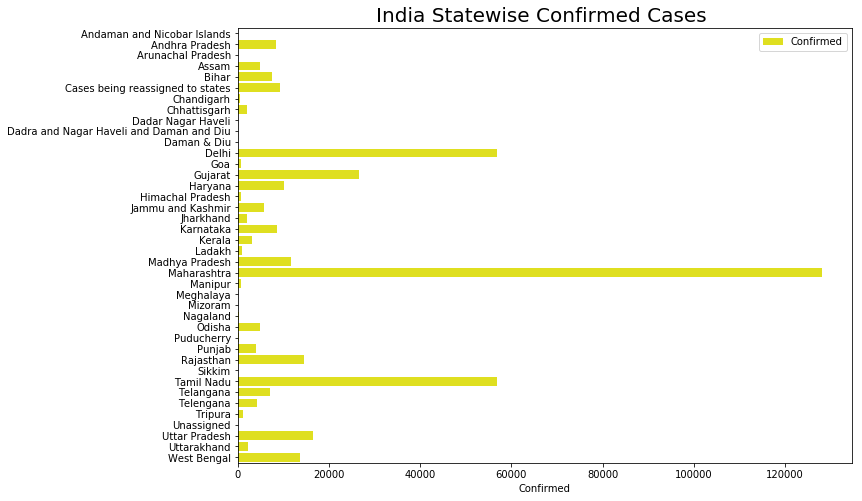

In [93]:
state_test=pd.pivot_table(covid_data,values=['Confirmed'],index='State/UnionTerritory',aggfunc='max')
state_names=list(state_test.index)
state_test['State/UnionTerritory']=state_names
plt.figure(figsize=(11,8))
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed",y=state_names,data=state_test,label="Confirmed",color='yellow')
plt.title('India Statewise Confirmed Cases ',fontsize=20)
plt.legend(ncol=1,loc="upper right",frameon=True);

# Cured Cases

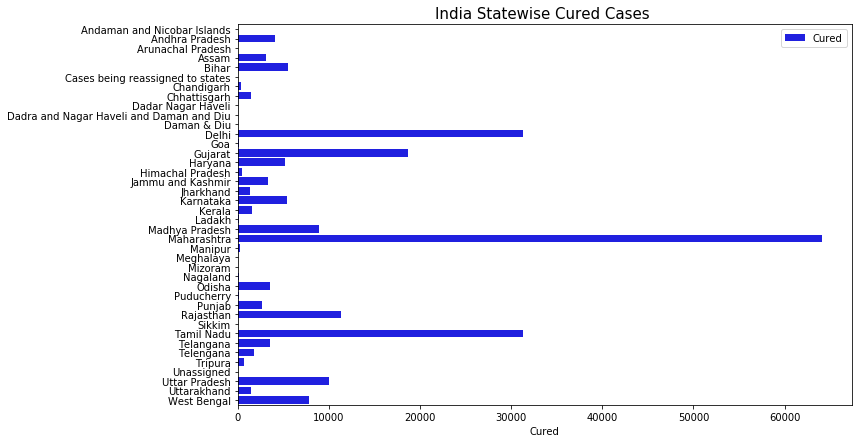

In [94]:
state_test=pd.pivot_table(covid_data,values=['Cured'],index='State/UnionTerritory',aggfunc='max')
state_names=list(state_test.index)
state_test['State/UnionTerritory']=state_names
plt.figure(figsize=(11,7))
sns.set_color_codes("pastel")
sns.barplot(x="Cured",y=state_names,data=state_test,label="Cured",color='blue')
plt.title('India Statewise Cured Cases ',fontsize=15)
plt.legend(ncol=1,loc="upper right",frameon=True);

# Deaths Cases

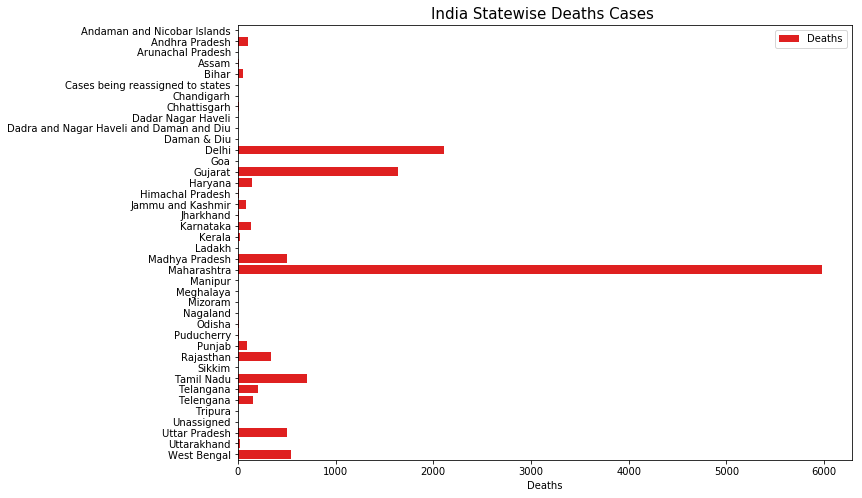

In [95]:
state_test=pd.pivot_table(covid_data, values=['Deaths'],index='State/UnionTerritory',aggfunc='max')
state_names=list(state_test.index)
state_test['State/UnionTerritory']=state_names
plt.figure(figsize=(11,8))
sns.set_color_codes("pastel")
sns.barplot(x="Deaths",y= state_names,data=state_test,label="Deaths",color='red')
plt.title('India Statewise Deaths Cases ',fontsize=15)
plt.legend(ncol=1,loc="upper right",frameon=True);

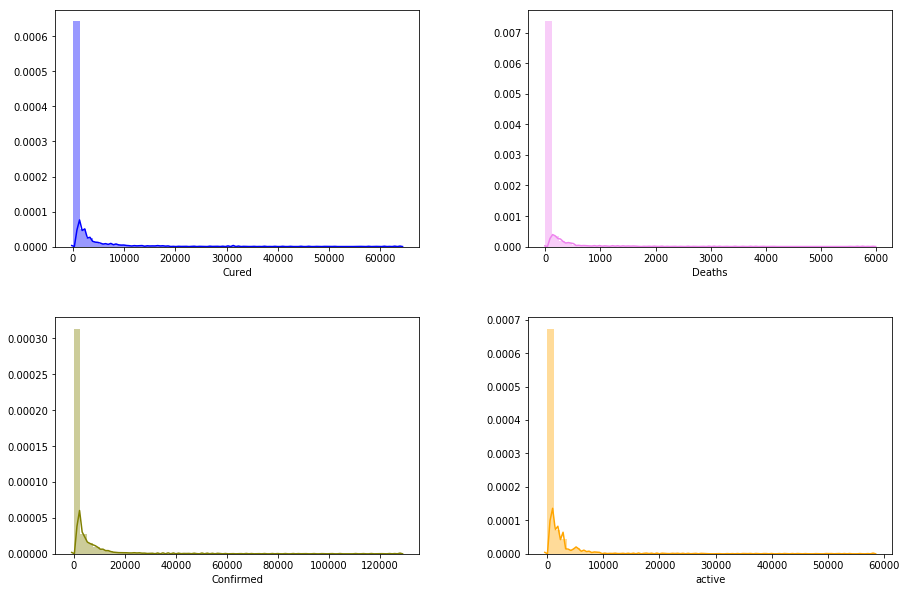

In [96]:
covid_data['active']=covid_data['Confirmed']-(covid_data['Cured']+covid_data['Deaths'])
f,axes=plt.subplots(2,2,figsize=(15,10))
sns.distplot(covid_data["Cured"],color="blue",ax=axes[0,0])
sns.distplot(covid_data["Deaths"],color="violet",ax=axes[0,1])
sns.distplot(covid_data["Confirmed"],color="olive",ax=axes[1,0])
sns.distplot(covid_data["active"],color="orange",ax=axes[1,1])
f.subplots_adjust(hspace=.3,wspace=.3)

# IMPACT ON LIFESTYLE

In [97]:
lifestyle={'lifestyle':['Not waste food','Be environment conscious','Be more mindful of Health','Become more hygienic','More Family Time','Spend less on Clothes','Made in India products','Take work more seriously','Boycott Chinese goods'],
          'percentage':[67.7,45.6,44.3,40.5,31.8,31.4,26.4,25.5,24.6]}
lifestyle=pd.DataFrame(data=lifestyle,index=range(9))
lifestyle

,lifestyle,percentage
0,Not waste food,67.7
1,Be environment conscious,45.6
2,Be more mindful of Health,44.3
3,Become more hygienic,40.5
4,More Family Time,31.8
5,Spend less on Clothes,31.4
6,Made in India products,26.4
7,Take work more seriously,25.5
8,Boycott Chinese goods,24.6


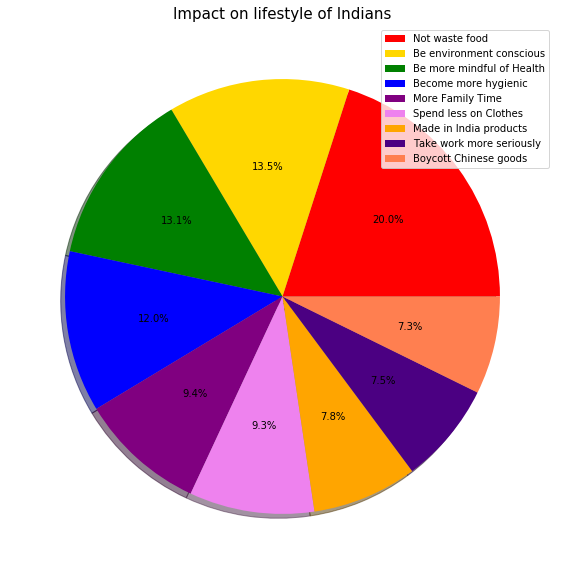

In [98]:
plt.figure(figsize=(10,10))
plt.title("Impact on lifestyle of Indians",fontsize=15)
plt.pie(lifestyle["percentage"],colors=['red','gold','green','blue','purple','violet','orange','indigo','coral'],
        autopct="%1.1f%%",shadow=True)
plt.legend(lifestyle['lifestyle'],loc='upper right')
plt.show() 

# Machine Learning using Regression Method

# Labelling attribute name

In [17]:
lbl=LabelEncoder()
covid_data['State/UnionTerritory']=lbl.fit_transform(covid_data['State/UnionTerritory'])
covid_data['date']=covid_data['Date'].dt.day


# Training and Testing Model

In [18]:
X=covid_data[['State/UnionTerritory','date','Cured','Deaths','ConfirmedIndianNational','ConfirmedForeignNational']]
y=covid_data['Confirmed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# 1.Linear Regression

In [19]:
# Fitting Linear Regression to the dataset
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
y_pred=lin_reg.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred)
score1

0.9652097251684922

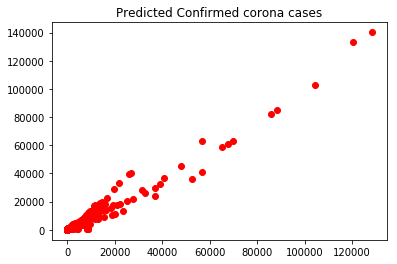

In [24]:
plt.scatter(y_test,y_pred,color="red")
plt.title('Predicted Confirmed corona cases')
plt.show()

# 2. Polynomial Regression

In [26]:
#Use degree 4
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)

In [27]:
poly_reg.fit(X_poly, y)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
lin_reg_2.predict(poly_reg.fit_transform(X_test))

array([ 3.16563905e+03,  3.68165547e+02,  3.60036482e+02, -2.99010907e+02,
        1.35516438e+02,  3.37203132e+02,  1.76779735e+02,  3.40896312e+03,
        1.24364084e+04,  3.81651498e+02,  5.24114118e+02,  4.18589474e+04,
        6.72020434e+02,  1.70917112e+04,  9.03752571e+01,  1.76423254e+02,
        1.07431833e+03,  5.28949535e+01,  1.93602805e+02,  5.40079293e+02,
        7.73216653e+02,  6.52783307e+04,  5.37597943e+02,  4.03921377e+02,
        6.82805337e+02,  2.91734421e+02,  2.23236951e+01, -1.11620793e+02,
        2.46174096e+03,  1.77920690e+02,  1.60791890e+04,  1.20724534e+03,
        9.40070846e+01,  5.00978162e+02,  6.01018819e+02,  2.49623460e+02,
       -2.74731773e+02,  3.51560882e+02,  5.22836804e+01,  4.83535622e+02,
        5.41290753e+02,  2.13279020e+02,  4.06851236e+02,  4.52112414e+03,
        4.40472849e+03,  9.27334262e+02,  3.28864505e+02,  2.18660885e+02,
        3.57470588e+02,  5.44302027e+03,  3.85038171e+02,  6.34297659e+02,
        1.85950462e+02,  

In [29]:
#r2 score
from sklearn.metrics import r2_score
score2=r2_score(y, lin_reg_2.predict(poly_reg.fit_transform(X)))
score2

0.9889380331466059

# 3.Random Forest Regression

In [45]:
rf=RandomForestRegressor(n_estimators=50,random_state=0)#n_estimator=number of trees default 10
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
y_pred=rf.predict(X_test)
y_pred


array([4.71496000e+03, 3.81000000e+01, 4.79580000e+02, 1.51160000e+01,
       1.18000000e+00, 1.00000000e+00, 4.50000000e+00, 3.05706000e+03,
       1.25826200e+04, 1.62820000e+02, 2.30540000e+02, 4.07872800e+04,
       4.13260000e+02, 1.56086600e+04, 1.99000000e+01, 3.65105685e+01,
       6.68140000e+02, 6.81400000e+01, 3.00000000e+00, 4.72762143e+01,
       1.62974000e+03, 6.39810000e+04, 4.31610000e+02, 3.65200000e+01,
       6.07932000e+02, 1.00000000e+00, 5.38800000e+01, 1.18333333e+00,
       4.25792000e+03, 3.58416667e+01, 1.43227000e+04, 1.17530000e+03,
       1.15000000e+00, 2.07200000e+01, 2.99900000e+02, 3.93600000e+01,
       3.50400000e+01, 4.70216667e+01, 3.85000000e+01, 1.87526667e+02,
       1.15814714e+02, 3.53400000e+01, 4.47793333e+01, 3.50978000e+03,
       3.78144000e+03, 1.20030000e+03, 3.26794805e+00, 1.00000000e+00,
       6.20030000e+02, 3.53607000e+03, 1.03847000e+02, 3.74372000e+02,
       1.25152619e+01, 5.45800000e+01, 3.48000000e+00, 6.20300000e+01,
      

In [47]:
from sklearn.metrics import r2_score
score3=r2_score(y_test,y_pred)
score3

0.9879805822433785

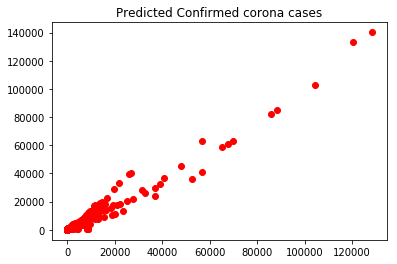

In [23]:
plt.scatter(y_test,y_pred,color="red")
plt.title('Predicted Confirmed corona cases')
plt.show()

# 4. Decision Tree Regression

In [110]:
dt=DecisionTreeRegressor(random_state=0,criterion="mae")
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [111]:
#predicting new model
y_pred=dt.predict(X_test)
y_pred

array([4.48400e+03, 1.20000e+01, 4.47000e+02, 2.30000e+01, 1.00000e+00,
       1.00000e+00, 2.00000e+00, 3.04900e+03, 1.09880e+04, 5.76000e+02,
       2.17000e+02, 3.87160e+04, 4.15000e+02, 1.73860e+04, 2.00000e+01,
       3.45000e+01, 6.30000e+02, 6.80000e+01, 3.00000e+00, 4.30000e+01,
       1.45600e+03, 7.23000e+04, 4.63000e+02, 6.20000e+01, 5.80000e+02,
       1.00000e+00, 5.10000e+01, 1.00000e+00, 3.40800e+03, 3.30000e+01,
       1.36640e+04, 1.08800e+03, 1.00000e+00, 2.10000e+01, 2.41000e+02,
       3.50000e+01, 3.30000e+01, 3.00000e+01, 3.60000e+01, 2.05000e+02,
       2.86000e+02, 3.00000e+01, 7.00000e+01, 3.14000e+03, 4.00900e+03,
       1.03900e+03, 4.00000e+00, 1.00000e+00, 7.37000e+02, 3.17100e+03,
       1.07500e+02, 1.06900e+03, 1.30000e+01, 5.20000e+01, 2.00000e+00,
       6.30000e+01, 2.80000e+01, 2.60000e+01, 4.10000e+01, 3.50000e+01,
       9.00000e+00, 7.45000e+01, 2.86000e+02, 8.07500e+03, 2.00000e+00,
       1.90940e+04, 1.10700e+03, 8.92700e+03, 1.00000e+00, 7.200

In [49]:
from sklearn.metrics import r2_score
score4=r2_score(y_test,y_pred)
score4

0.9879805822433785

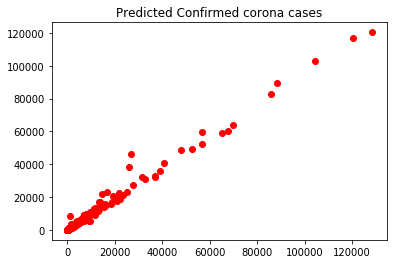

In [50]:
plt.scatter(y_test,y_pred,color="red")
plt.title('Predicted Confirmed corona cases')
plt.show()

# Plotting models with score using LinearRegression Method

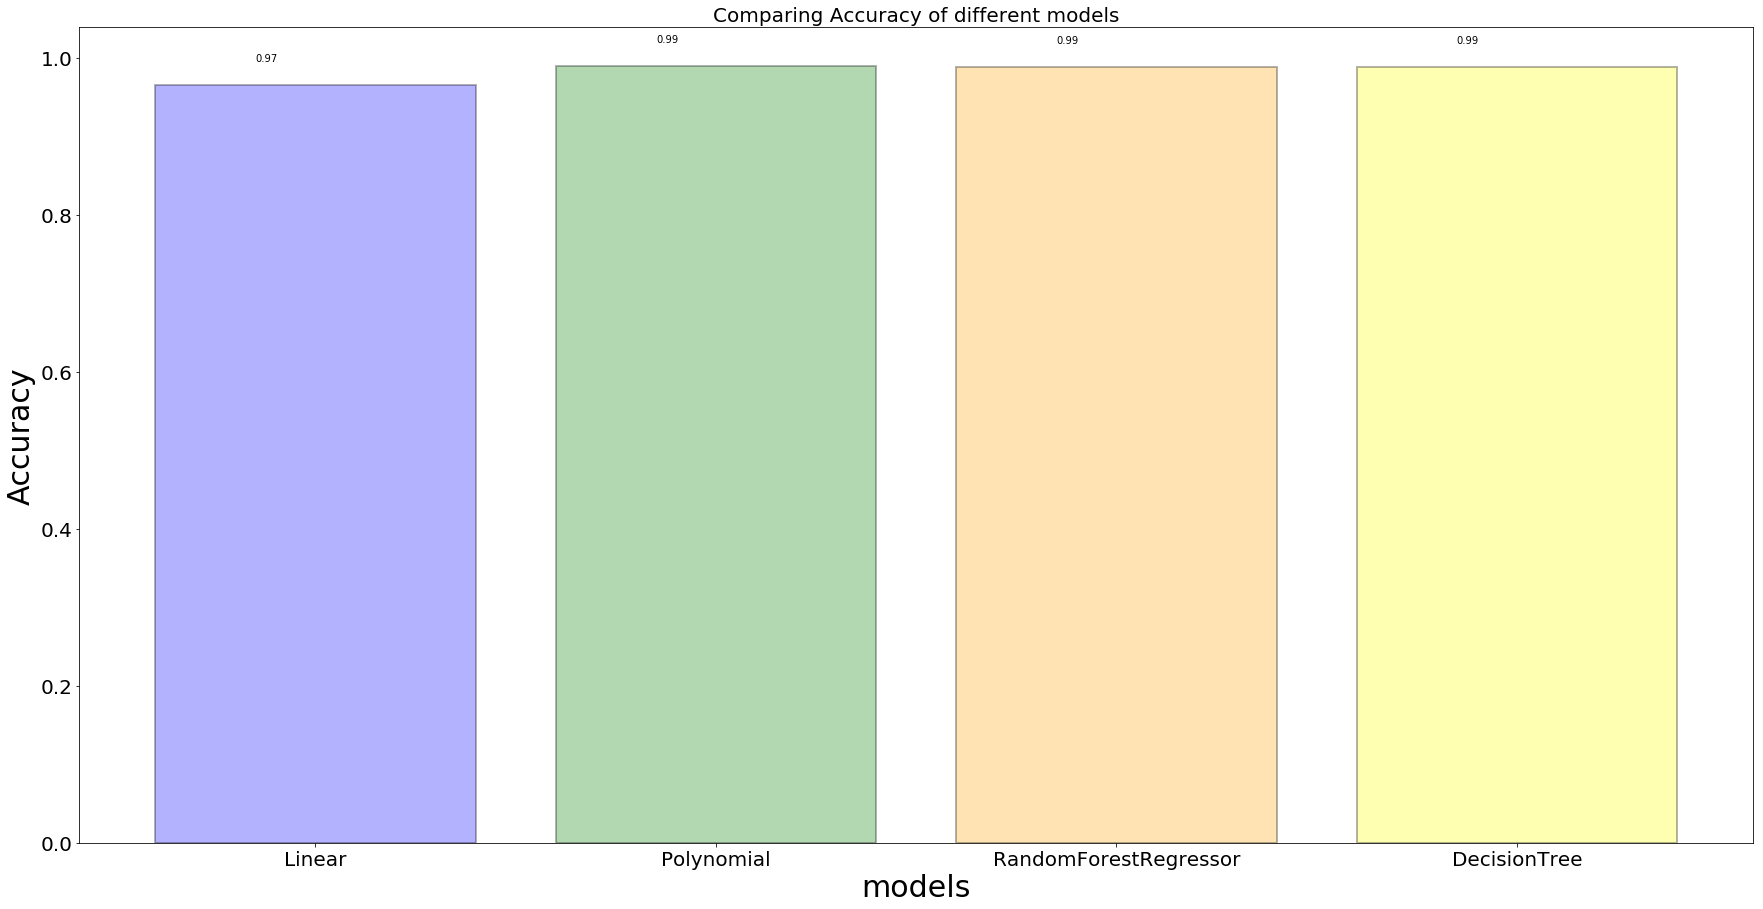

In [51]:
scores=[score1,score2,score3,score4]
models=['Linear','Polynomial','RandomForestRegressor','DecisionTree']
plt.figure(figsize=(30,15))
plt.title('Comparing Accuracy of different models',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('models',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.bar(models,scores,color=['blue','green','orange','yellow'],alpha=0.3,linewidth=2,edgecolor='black')
for i,v in enumerate(scores):
    plt.text(i-.15,v+.03,format(scores[i],'.2f'),fontsize=10)

In [126]:
Regression_Types=['Linear Regression','Polynomial Regression','Random Forest','Decision Tree']
score=['97','99','99','96']

In [128]:
indiadataframe=pd.DataFrame({'Regression_Types':Regression_Types,'score':score})
indiadataframe

,Regression_Types,score
0,Linear Regression,97
1,Polynomial Regression,99
2,Random Forest,99
3,Decision Tree,96


# World dataset

# 1.Display the Dataset

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284


In [4]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,792,796,797,797,797,799,799,799,799,799
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,77,77,77,77,81,81,81,81,93,93


In [5]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,581,598,618,639,675,683,703,721,733,746
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,44,44,45,47,49,51,53,55,58,62
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,845,852,861,869,878,885,892,897,905,912
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,9,10,10,10,10,10,10,11,11,13


# Data understanding and Cleaning 

In [6]:
#extracting all the columns using the .keys() function
cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20',
       '6/27/20', '6/28/20', '6/29/20', '6/30/20'],
      dtype='object', length=165)

In [7]:
#extracting only the dates columns that have information of confirmed,deaths and recovered cases
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths=death_cases.loc[:,cols[4]:cols[-1]]
recovered=recovered_cases.loc[:,cols[4]:cols[-1]]

In [10]:
#check the head of the outbreak cases
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,0,0,0,0,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,0,0,0,0,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,0,0,0,0,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284


# Data Exploration and Analysis

In [8]:
#Finding the total confirmed cases,death cases and the recovered cases and append them to n empty list.
#also calculate the total mortality rate which is death_sum/Confirmed cases
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]
total_confirmed=[]
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    total_confirmed.append(confirmed_sum)

In [12]:
#Display each of newly created variables
confirmed_sum

10475826

In [13]:
death_sum

511253

In [14]:
recovered_sum

5353205

In [9]:
#convert all the and the cases in the form of numpy array
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)
total_confirmed=np.array(total_confirmed).reshape(-1,1)
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

# Future Forecasting

In [10]:
#future forecasting or the next 10 days
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [11]:
#Convert all the integers into datetime for better visualization
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime("%m/%d/%Y"))
    

In [15]:
#For visualization with the latest data of 30th of June
latest_confirmed=confirmed_cases[dates[-1]]
latest_recovered=recovered_cases[dates[-1]]
latest_death=death_cases[dates[-1]]


# Unique Countries

In [16]:
#find the list of unique countries
unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

# Total number of cases by each Country

In [17]:
#Calculate total number of cases by each country 
country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)
unique_countries=[k for k,v in sorted(zip(unique_countries, country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [18]:
#number of cases per country/region
print("Confirmed cases by Countries /Region:")
for i in range (len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]}cases')

Confirmed cases by Countries /Region:
US:2635417cases
Brazil:1402041cases
Russia:646929cases
India:585481cases
United Kingdom:314160cases
Peru:285213cases
Chile:279393cases
Spain:249271cases
Italy:240578cases
Iran:227662cases
Mexico:226089cases
Pakistan:213470cases
France:202063cases
Turkey:199906cases
Germany:195418cases
Saudi Arabia:190823cases
South Africa:151209cases
Bangladesh:145483cases
Canada:106097cases
Qatar:96088cases
Colombia:95269cases
China:84785cases
Sweden:68451cases
Egypt:68311cases
Argentina:64530cases
Belarus:62118cases
Belgium:61427cases
Ecuador:56432cases
Indonesia:56385cases
Netherlands:50483cases
Iraq:49109cases
United Arab Emirates:48667cases
Kuwait:46195cases
Ukraine:45254cases
Singapore:43907cases
Portugal:42141cases
Oman:40070cases
Philippines:37514cases
Poland:34393cases
Panama:33550cases
Bolivia:33219cases
Dominican Republic:32568cases
Switzerland:31714cases
Afghanistan:31517cases
Romania:26970cases
Bahrain:26758cases
Nigeria:25694cases
Armenia:25542cases
I

# Graphing the number of confirmed cases,deaths, recoveries, mortality rate 

# 1.Confirmed Cases

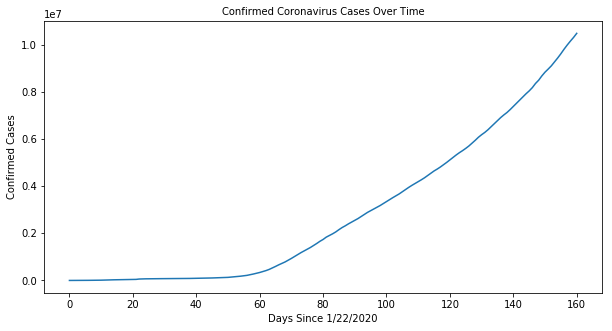

In [21]:
adjusted_dates=adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, world_cases)
plt.title('Confirmed Coronavirus Cases Over Time', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Confirmed Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# 2.Deaths Cases

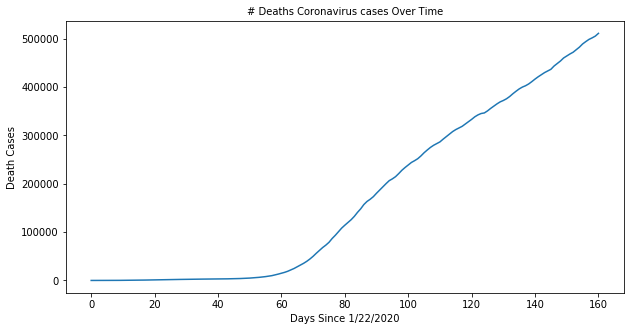

In [22]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates,total_deaths)
plt.title('# Deaths Coronavirus cases Over Time', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Death Cases',size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


# 3.Recovered Cases

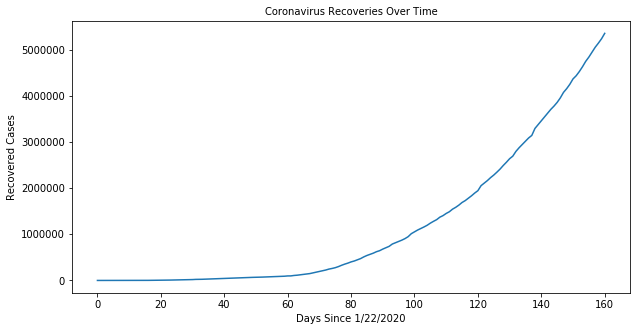

In [23]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates,total_recovered)
plt.title('Coronavirus Recoveries Over Time',size=10)
plt.xlabel('Days Since 1/22/2020',size=10)
plt.ylabel('Recovered Cases',size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# 4.Mortality Rate

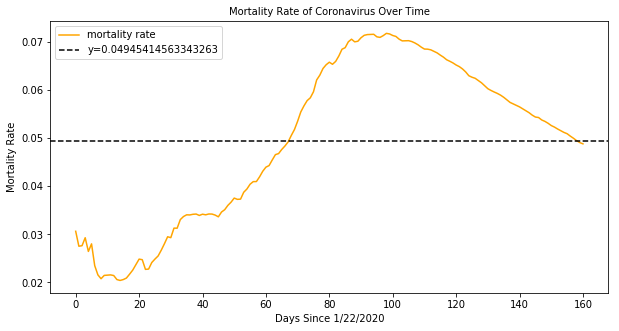

In [24]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates, mortality_rate,color='orange')
plt.axhline(y=mean_mortality_rate,linestyle='--',color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=10)
plt.legend(['mortality rate','y='+str(mean_mortality_rate)],prop={'size': 10})
plt.xlabel('Days Since 1/22/2020',size=10)
plt.ylabel('Mortality Rate',size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Data Analysis top 10 countries

In [25]:
#Only show the country with the most confirmed cases,the rest grouped name into category named others
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
visual_unique_countries.append('others')
visual_confirmed_cases.append(others)

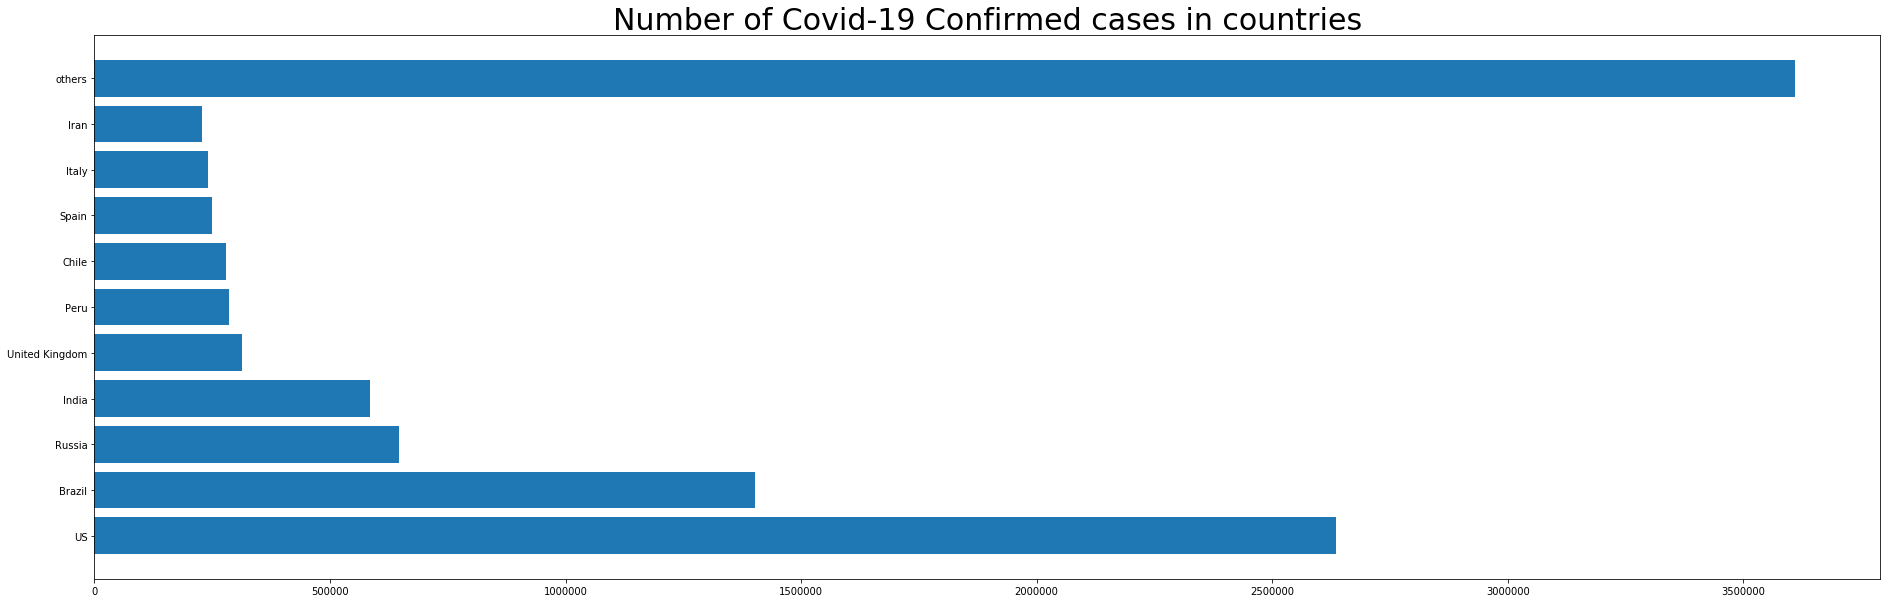

In [26]:
#visualize the 10 countries
plt.figure(figsize=(32,10))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed cases in countries',size=30)
plt.show()

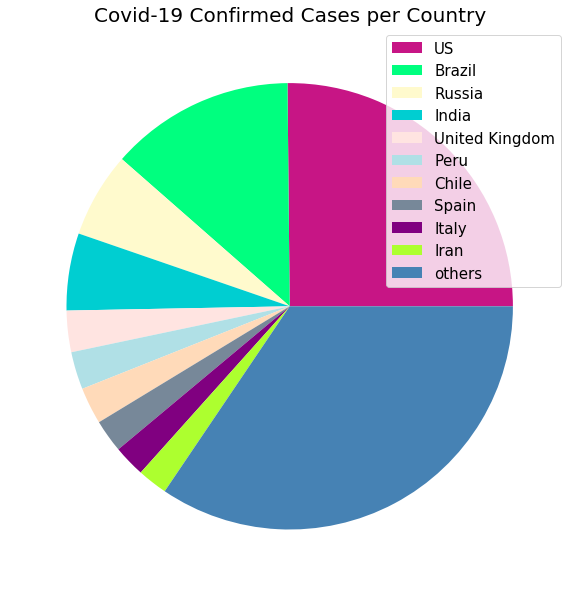

In [27]:
def plot_pie_charts(x, y, title):
    c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
    plt.figure(figsize=(10,20))
    plt.title(title,size=20)
    plt.pie(y,colors=c)
    plt.legend(x,loc='best',fontsize=15)
    plt.show()
plot_pie_charts(visual_unique_countries,visual_confirmed_cases,'Covid-19 Confirmed Cases per Country')

# 1.Confirmed cases across the world and prediction future confirmed cases

# Splitting data into train and test for model

In [30]:
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(days_since_1_22,total_confirmed,
                                                                                       test_size=0.2,random_state=0)

# a]Linear Regression

In [35]:
# Fitting Linear Regression to the dataset
lin_reg=LinearRegression()
lin_reg.fit(X_train_confirmed,y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
y_pred=lin_reg.predict(X_test_confirmed)
linear_pred = lin_reg.predict(future_forecast)

In [38]:
print('MAE:',mean_absolute_error(y_pred, y_test_confirmed))
print('MSE:',mean_squared_error(y_pred,y_test_confirmed))
print('R2 Score:',r2_score(y_test_confirmed,y_pred))

MAE: 899537.9529294155
MSE: 1073034137902.5249
R2 Score: 0.8858777154499443


# Predictions for confirmed coronavirus cases worldwide


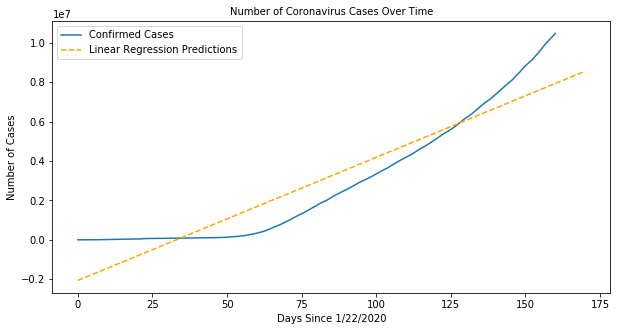

In [40]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates,total_confirmed)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases Over Time',size=10)
plt.xlabel('Days Since 1/22/2020',size=10)
plt.ylabel('Number of Cases',size=10)
plt.legend(['Confirmed Cases','Linear Regression Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


# b]Polynomial Regression

In [41]:
#again change degree use degree 
poly_reg=PolynomialFeatures(degree=4)
poly_X_train_confirmed=poly_reg.fit_transform(X_train_confirmed)
poly_X_test_confirmed=poly_reg.fit_transform(X_test_confirmed)
poly_future_forecast=poly_reg.fit_transform(future_forecast)

In [42]:
linear_model=LinearRegression(normalize=True,fit_intercept=False)
linear_model.fit(poly_X_train_confirmed,y_train_confirmed)
test_linear_pred=linear_model.predict(poly_X_test_confirmed)
linear_pred_us=linear_model.predict(poly_future_forecast)

In [43]:
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
print('R2 Score:',r2_score(y_test_confirmed,test_linear_pred))

MAE: 139394.47267833957
MSE: 25659996433.040592
R2 Score: 0.9972709373252476


# Predictions for confirmed coronavirus cases worldwide


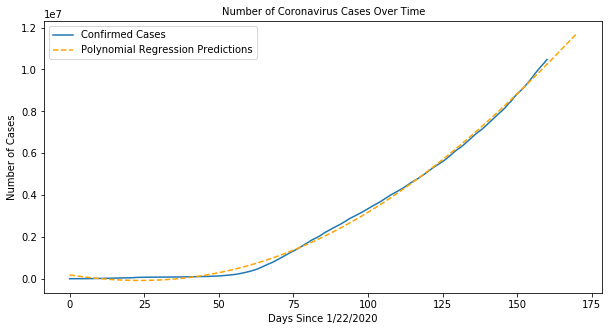

In [45]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates,total_confirmed)
plt.plot(future_forecast,linear_pred_us,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases Over Time',size=10)
plt.xlabel('Days Since 1/22/2020',size=10)
plt.ylabel('Number of Cases',size=10)
plt.legend(['Confirmed Cases','Polynomial Regression Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# c]Random Forest Regression

In [46]:
rf_reg=RandomForestRegressor(n_estimators=50,random_state=0)
rf_reg.fit(X_train_confirmed,y_train_confirmed)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
y_pred=rf_reg.predict(X_test_confirmed)
rf_pred=rf_reg.predict(future_forecast)

In [48]:
print('MAE:', mean_absolute_error(y_pred,y_test_confirmed))
print('MSE:',mean_squared_error(y_pred,y_test_confirmed))
print('R2 Score:',r2_score(y_test_confirmed,y_pred))

MAE: 36148.67515151517
MSE: 2658396892.600705
R2 Score: 0.9997172668455662


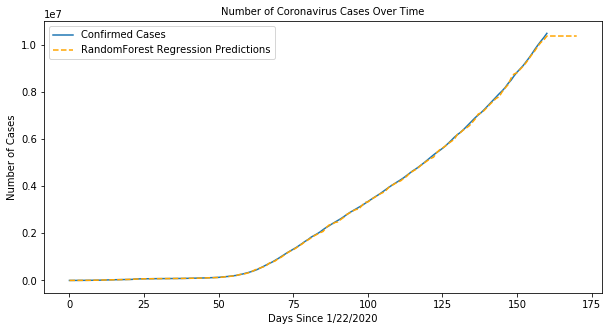

In [49]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates, total_confirmed)
plt.plot(future_forecast,rf_pred,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases Over Time',size=10)
plt.xlabel('Days Since 1/22/2020',size=10)
plt.ylabel('Number of Cases',size=10)
plt.legend(['Confirmed Cases','RandomForest Regression Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# d]Decision Tree Regression

In [58]:
dt_reg=DecisionTreeRegressor(random_state=0,criterion="mae")
dt_reg.fit(X_train_confirmed,y_train_confirmed)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [59]:
y_pred=dt_reg.predict(X_test_confirmed)
dt_pred=dt_reg.predict(future_forecast)

In [60]:
print('MAE:', mean_absolute_error(y_pred,y_test_confirmed))
print('MSE:',mean_squared_error(y_pred,y_test_confirmed))
print('R2 Score:',r2_score(y_test_confirmed,y_pred))

MAE: 67762.51515151515
MSE: 7539529417.909091
R2 Score: 0.9991981351839504


# Predictions for confirmed coronavirus cases worldwide


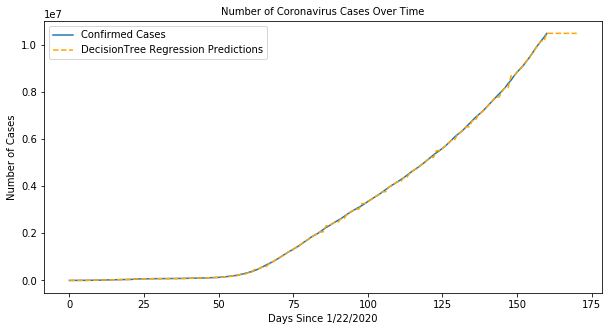

In [61]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates,total_confirmed)
plt.plot(future_forecast,dt_pred,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases Over Time',size=10)
plt.xlabel('Days Since 1/22/2020',size=10)
plt.ylabel('Number of Cases',size=10)
plt.legend(['Confirmed Cases','DecisionTree Regression Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Support Vector Regression

In [62]:
svm_confirmed=SVR(shrinking=True,kernel='poly',gamma=0.01, epsilon=1,degree=3)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred=svm_confirmed.predict(future_forecast)
svm_test_pred=svm_confirmed.predict(X_test_confirmed)


In [63]:
# check against testing data
print('MAE:',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
print('R2 Score:',r2_score(y_test_confirmed,svm_test_pred))

MAE: 296146.97891668114
MSE: 129790788380.3359
R2 Score: 0.9861961322941039


# Predictions for confirmed coronavirus cases worldwide

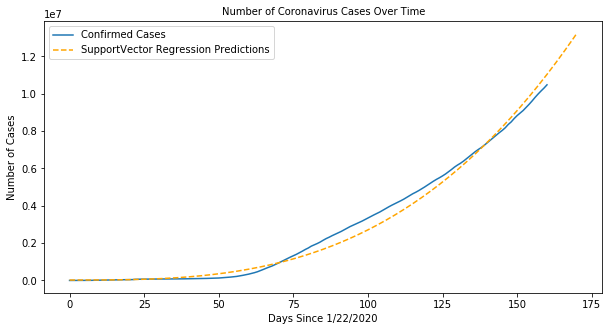

In [64]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates,total_confirmed)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases Over Time',size=10)
plt.xlabel('Days Since 1/22/2020',size=10)
plt.ylabel('Number of Cases',size=10)
plt.legend(['Confirmed Cases','SupportVector Regression Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [31]:
Regression_Types=['Linear Regression','Polynomial Regression','Random Forest','Decision Tree','SVM']
score=['88','99','99','99','98']

In [32]:
Worlddataframe=pd.DataFrame({'Regression_Types':Regression_Types,'score':score})
Worlddataframe

,Regression_Types,score
0,Linear Regression,88
1,Polynomial Regression,99
2,Random Forest,99
3,Decision Tree,99
4,SVM,98


# Conclusion

In [ ]:
First Looking for India Dataset large number of Confirmed,Recovered and Death Cases in Maharashtra and count will be very high.
Compare to world dataset India has 4th position.'Us' is first position.using Machine learning algorithms for Confirmed Cases 
best Prediction are polynomial,Random Forest and Decision Tree Regreesion.Having an Accuracy is 99%.In daily basis count will be 
increases.Highly Spread this Disease all world and We are already read the sympotomes for this disease.To avoid critical
situation people are suggested to do following things:
1.Wash your hands frequently and caefully.
2.Avoid touching your face.
3.Stop shaking hands and hugging people for now.
4.Dont Share Personal items example phone,makeup and comb.
5.Do not gather in groups.
6.Cover your mouth and nose when you cough and sneeze.
    